In [ ]:
import warnings; warnings.simplefilter('ignore')
from pathlib import Path

import numpy as np
import astropy.units as u
from sunpy.net import Fido, attrs as a
from sunpy.map import Map

from itipy.download.util import download_url

# SDO/AIA EUV

### Sample (ITI)

In [ ]:
sample_f = Path("../sample/iti-dataset/sdo/171/2021-11-11T00:00:00.fits")
sample_map = Map(sample_f)
print("T_REC   :", sample_map.meta["T_REC"])     # Time for Query
print("T_OBS   :", sample_map.meta["T_OBS"])     # Center of Obs Interval
print("DATE-OBS:", sample_map.meta["DATE-OBS"])  # Beginning of Obs Interval
print("EXPTIME :", sample_map.meta["EXPTIME"])   # Exposure Time

T_REC   : 2021-11-10T23:59:59Z
T_OBS   : 2021-11-11T00:00:10.35Z
DATE-OBS: 2021-11-11T00:00:09.35Z
EXPTIME : 2.000166


### JSOC - SDOAIAEUVDownloader

In [ ]:
downloader_f = Path("./data/sdo/171/20211111_000009.fits")

if not downloader_f.exists():
    from itipy.download.download_sdo_aia_euv import SDOAIAEUVDownloader
    from datetime import datetime

    downloader = SDOAIAEUVDownloader(ds_path="./data/sdo", email="mgjeon@khu.ac.kr", wavelengths=[171])

    d = datetime.strptime("2021-11-11", "%Y-%m-%d")
    downloader.downloadDate(d)

downloader_map = Map(downloader_f)
print("T_REC   :", downloader_map.meta["T_REC"])
print("T_OBS   :", downloader_map.meta["T_OBS"])
print("DATE-OBS:", downloader_map.meta["DATE-OBS"])
print("EXPTIME :", downloader_map.meta["EXPTIME"])

2025-02-14 07:23:21,030 - SDOAIAEUVDownloader - INFO - Start download: 2021-11-11T00:00:00
171: 100%|██████████| 11.2M/11.2M [00:03<00:00, 3.27MB/s]
2025-02-14 07:23:26,433 - SDOAIAEUVDownloader - INFO - Finished: 2021-11-11T00:00:00


T_REC   : 2021-11-10T23:59:59Z
T_OBS   : 2021-11-11T00:00:10.35Z
DATE-OBS: 2021-11-11T00:00:09.35Z
EXPTIME : 2.000166


### SunPy - JSOC

In [ ]:
res = Fido.search(a.Time('2021-11-11T00:00:00', '2021-11-11T00:00:05'),
                  a.jsoc.Series('aia.lev1_euv_12s'),
                  a.Wavelength(171*u.AA),
                  a.jsoc.Notify("mgjeon@khu.ac.kr"),
                  a.jsoc.Segment('image'))
res

T_REC,TELESCOP,INSTRUME,WAVELNTH,CAR_ROT
str20,str7,str5,int64,int64
2021-11-10T23:59:59Z,SDO/AIA,AIA_3,171,2250


In [ ]:
res[0][0]

T_REC,T_OBS,WAVELNTH,DATE,FSN,EXPTIME,QUALITY,ORIGIN,TELESCOP,INSTRUME,DATE__OBS,DATE-OBS,CAMERA,IMG_TYPE,EXPSDEV,INT_TIME,WAVEUNIT,WAVE_STR,FID,QUALLEV0,TOTVALS,DATAVALS,MISSVALS,PERCENTD,DATAMIN,DATAMAX,DATAMEDN,DATAMEAN,DATARMS,DATASKEW,DATAKURT,DATACENT,DATAP01,DATAP10,DATAP25,DATAP75,DATAP90,DATAP95,DATAP98,DATAP99,NSATPIX,OSCNMEAN,OSCNRMS,FLAT_REC,NSPIKES,CTYPE1,CUNIT1,CRVAL1,CDELT1,CRPIX1,CTYPE2,CUNIT2,CRVAL2,CDELT2,CRPIX2,CROTA2,R_SUN,MPO_REC,INST_ROT,IMSCL_MP,X0_MP,Y0_MP,ASD_REC,SAT_Y0,SAT_Z0,SAT_ROT,ACS_MODE,ACS_ECLP,ACS_SUNP,ACS_SAFE,ACS_CGT,ORB_REC,DSUN_REF,DSUN_OBS,RSUN_REF,RSUN_OBS,GAEX_OBS,GAEY_OBS,GAEZ_OBS,HAEX_OBS,HAEY_OBS,HAEZ_OBS,OBS_VR,OBS_VW,OBS_VN,CAR_ROT,CRLT_OBS,CRLN_OBS,HGLN_OBS,HGLT_OBS,ROI_NWIN,CALVER32,ROI_SUM,ROI_NAX1,ROI_NAY1,ROI_LLX1,ROI_LLY1,ROI_NAX2,ROI_NAY2,ROI_LLX2,ROI_LLY2,PIXLUNIT,DN_GAIN,EFF_AREA,EFF_AR_V,TEMPCCD,TEMPGT,TEMPSMIR,TEMPFPAD,ISPSNAME,ISPPKTIM,ISPPKTVN,AIVNMST,AIMGOTS,ASQHDR,ASQTNUM,ASQFSN,AIAHFSN,AECDELAY,AIAECTI,AIASEN,AIFDBID,AIMGOTSS,AIFCPS,AIFTSWTH,AIFRMLID,AIFTSID,AIHISMXB,AIHIS192,AIHIS348,AIHIS604,AIHIS860,AIFWEN,AIMGSHCE,AECTYPE,AECMODE,AISTATE,AIAECENF,AIFILTYP,AIMSHOBC,AIMSHOBE,AIMSHOTC,AIMSHOTE,AIMSHCBC,AIMSHCBE,AIMSHCTC,AIMSHCTE,AICFGDL1,AICFGDL2,AICFGDL3,AICFGDL4,AIFOENFL,AIMGFSN,AIMGTYP,AIAWVLEN,AIAGP1,AIAGP2,AIAGP3,AIAGP4,AIAGP5,AIAGP6,AIAGP7,AIAGP8,AIAGP9,AIAGP10,AGT1SVY,AGT1SVZ,AGT2SVY,AGT2SVZ,AGT3SVY,AGT3SVZ,AGT4SVY,AGT4SVZ,AIMGSHEN,KEYWDDOC,LVL_NUM,T_REC_step,T_REC_epoch,image
str20,str23,int64,str20,int64,float64,int64,str12,str7,str5,str23,str23,int64,str5,float64,float64,str8,str8,int64,int64,int64,int64,int64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,str20,int64,str8,str6,float64,float64,float64,str8,str6,float64,float64,float64,float64,float64,str30,float64,float64,float64,float64,str29,float64,float64,float64,str7,str2,str3,str2,str3,str46,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,float64,float64,float64,float64,float64,float64,float64,str17,str23,str7,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str2,str6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str74,float64,float64,str23,str41
2021-11-10T23:59:59Z,2021-11-11T00:00:10.35Z,171,2021-11-17T15:05:10Z,245238334,2.000166,0,SDO/JSOC-SDP,SDO/AIA,AIA_3,2021-11-11T00:00:09.35Z,2021-11-11T00:00:09.35Z,3,LIGHT,0.00012,2.273438,angstrom,171_THIN,0,0,16777216,16777216,0,100.0,-8,4158,130,162.0052,187.25,2.94,17.75,174.03,0.0,6.0,16.0,238.0,357.0,480.0,693.0,859.0,0,--,--,aia.flatfield[:#606],13999,HPLN-TAN,arcsec,0.0,0.599489,2055.86084,HPLT-TAN,arcsec,0.0,0.599489,2047.814087,0.019262,1616.804443,aia.master_pointing3h[:#45362],0.019327,0.599489,2054.86084,2046.814087,sdo.lev0_asd_0004[:#92916783],-3.137372,8.704931,-6.5e-05,SCIENCE,NO,YES,NO,GT3,sdo.fds_orbit_vectors[2021.11.11_00:00:00_UTC],149597870691.0,148114401641.84,696000000.0,969.256412,24675452.87,-33284235.49,7799114.9,98145119836.56,110929758946.62,2456032.56,1651.673578,28813.00266,-5377.451212,2250,3.314737,94.570778,-0.015242,3.314737,--,--,--,--,--,--,--,--,--,--,--,DN,17.7,2.486,8.0,-68.0,15.495,36.828,16.729,aia.lev0_isp_0011,2021-11-11T00:00:06.51Z,001.197,453,2015280047,2392721982,2,245238334,245238326,1539,0,0,241,5556,6,0,3339,40962,7,0,2782756,7727605,8388608,204,2000,2,ON,CLOSED,1,0,54.751999,68.716003,40.52,25.528,2054.852051,2068.724121,2040.755981,2025.848022,0,137,201,236,1,5,0,7,0,0,0,0,0,0,0,393,457,748,-3,-9,-9,-16,0,1,58,126,13,https://www.lmsal.com/s

In [ ]:
jsoc_f = Path("./data/sdo/171/aia.lev1_euv_12s.2021-11-11T000010Z.171.image_lev1.fits")

if not jsoc_f.exists():
    Fido.fetch(res, path='./data/sdo/171')

jsoc_map = Map(jsoc_f)
print("T_REC   :", jsoc_map.meta["T_REC"])
print("T_OBS   :", jsoc_map.meta["T_OBS"])
print("DATE-OBS:", jsoc_map.meta["DATE-OBS"])
print("EXPTIME :", jsoc_map.meta["EXPTIME"])

T_REC   : 2021-11-10T23:59:59.000
T_OBS   : 2021-11-11T00:00:10.347
DATE-OBS: 2021-11-11T00:00:09.347
EXPTIME : 2.0001659999999997


### SunPy - VSO

In [ ]:
res = Fido.search(a.Time('2021-11-11T00:00:00', '2021-11-11T00:00:15'),
                  a.Instrument('AIA'),
                  a.Wavelength(171*u.AA))
res

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size
,,,,Angstrom,,,,,,,Mibyte
Time,Time,str3,str3,float64[2],str4,str9,str6,str4,str4,str8,float64
2021-11-11 00:00:09.000,2021-11-11 00:00:10.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844


In [ ]:
vso_f = Path("./data/sdo/171/aia.lev1.171A_2021_11_11T00_00_09.35Z.image_lev1.fits")

if not vso_f.exists():
    vso_files = Fido.fetch(res, path='./data/sdo/171')

vso_map = Map(vso_f)
print("T_REC   :", vso_map.meta["T_REC"])
print("T_OBS   :", vso_map.meta["T_OBS"])
print("DATE-OBS:", vso_map.meta["DATE-OBS"])
print("EXPTIME:", vso_map.meta["EXPTIME"])

T_REC   : 2021-11-11T00:00:10Z
T_OBS   : 2021-11-11T00:00:10.35Z
DATE-OBS: 2021-11-11T00:00:09.35
EXPTIME: 2.000166


### URL - AIA synoptic (fits)

- https://hpde.io/NASA/NumericalData/SDO/AIA/Synoptic/PT120S.html
- https://jsoc1.stanford.edu/data/aia/synoptic

In [ ]:
synoptic_url = "https://jsoc1.stanford.edu/data/aia/synoptic/2021/11/11/H0000/AIA20211111_0000_0171.fits"
synoptic_f = Path("./data/sdo/171/AIA20211111_0000_0171.fits")
synoptic_f.parent.mkdir(parents=True, exist_ok=True)

if not synoptic_f.exists():
    download_url(url=synoptic_url, filename=synoptic_f)

synoptic_map = Map(synoptic_f)
print("T_REC   :", synoptic_map.meta["T_REC"])
print("T_OBS   :", synoptic_map.meta["T_OBS"])
print("DATE-OBS:", synoptic_map.meta["DATE-OBS"])
print("EXPTIME :", synoptic_map.meta["EXPTIME"])

AIA20211111_0000_0171.fits: 100%|██████████| 1.16M/1.16M [00:01<00:00, 941kB/s] 

T_REC   : 2021-11-11T00:00:10.000
T_OBS   : 2021-11-11T00:00:10.347
DATE-OBS: 2021-11-11T00:00:09.347
EXPTIME : 2.0001659999999997


### URL - AIA image (jp2)

- https://jsoc1.stanford.edu/data/aia/images

In [ ]:
jp2_url = "https://jsoc1.stanford.edu/data/aia/images/2021/11/11/171/2021_11_11__00_00_21_347__SDO_AIA_AIA_171.jp2"
jp2_f = Path("./data/sdo/171/2021_11_11__00_00_21_347__SDO_AIA_AIA_171.jp2")

if not jp2_f.exists():
    download_url(url=jp2_url, filename=jp2_f)

jp2_map = Map(jp2_f)
print("T_OBS   :", jp2_map.meta["T_OBS"])
print("DATE-OBS:", jp2_map.meta["DATE-OBS"])
print("EXPTIME :", jp2_map.meta["EXPTIME"])

2021_11_11__00_00_21_347__SDO_AIA_AIA_171.jp2: 100%|██████████| 1.01M/1.01M [00:01<00:00, 821kB/s] 


T_OBS   : 2021-11-11T00:00:22.347
DATE-OBS: 2021-11-11T00:00:21.347
EXPTIME : 2.000155


## Comparison

In [ ]:
print("Sample")
print(sample_map.meta["DATE-OBS"])
print(sample_map.data.shape, sample_map.data.min(), sample_map.data.max())
print(sample_map.rotation_matrix)
print()
print("Downloader")
print(downloader_map.meta["DATE-OBS"])
print(downloader_map.data.shape, downloader_map.data.min(), downloader_map.data.max())
print(downloader_map.rotation_matrix)
print()
print("JSOC")
print(jsoc_map.meta["DATE-OBS"])
print(jsoc_map.data.shape, jsoc_map.data.min(), jsoc_map.data.max())
print(jsoc_map.rotation_matrix)
print()
print("VSO")
print(vso_map.meta["DATE-OBS"])
print(vso_map.data.shape, vso_map.data.min(), vso_map.data.max())
print(vso_map.rotation_matrix)
print()
print("Synoptic")
print(synoptic_map.meta["DATE-OBS"])
print(synoptic_map.data.shape, synoptic_map.data.min(), synoptic_map.data.max())
print(synoptic_map.rotation_matrix)
print()
print("JP2")
print(jp2_map.meta["DATE-OBS"])
print(jp2_map.data.shape, jp2_map.data.min(), jp2_map.data.max())
print(jp2_map.rotation_matrix)
print()

Sample
2021-11-11T00:00:09.35Z
(4096, 4096) -8.0 4158.0
[[ 9.99999943e-01 -3.36185314e-04]
 [ 3.36185314e-04  9.99999943e-01]]

Downloader
2021-11-11T00:00:09.35Z
(4096, 4096) -8.0 4158.0
[[ 9.99999943e-01 -3.36185314e-04]
 [ 3.36185314e-04  9.99999943e-01]]

JSOC
2021-11-11T00:00:09.347
(4096, 4096) -8.0 4158.0
[[ 9.99999943e-01 -3.36186792e-04]
 [ 3.36186792e-04  9.99999943e-01]]

VSO
2021-11-11T00:00:09.35
(4096, 4096) -8.0 4158.0
[[ 9.99999943e-01 -3.36185314e-04]
 [ 3.36185314e-04  9.99999943e-01]]

Synoptic
2021-11-11T00:00:09.347
(1024, 1024) -1.1875 3577.75
[[ 1. -0.]
 [ 0.  1.]]

JP2
2021-11-11T00:00:21.347
(4096, 4096) 0 255
[[ 1. -0.]
 [ 0.  1.]]



In [ ]:
print("Sample == Downloader:", np.allclose(sample_map.data, downloader_map.data))
print("Sample == JSOC      :", np.allclose(sample_map.data, jsoc_map.data))
print("Sample == VSO       :", np.allclose(sample_map.data, vso_map.data))

Sample == Downloader: True
Sample == JSOC      : True
Sample == VSO       : True


### Peek

Sample


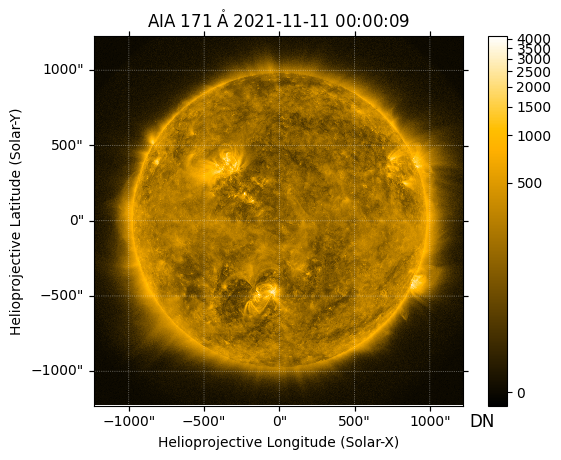

Downloader


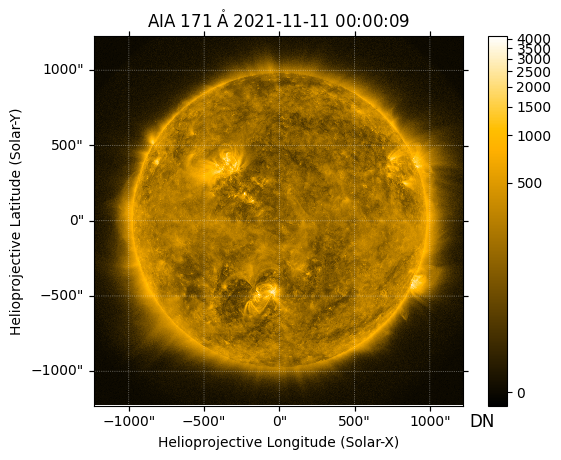

JSOC


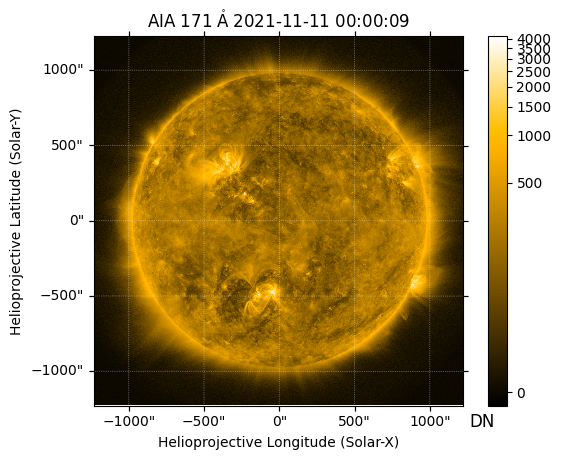

VSO


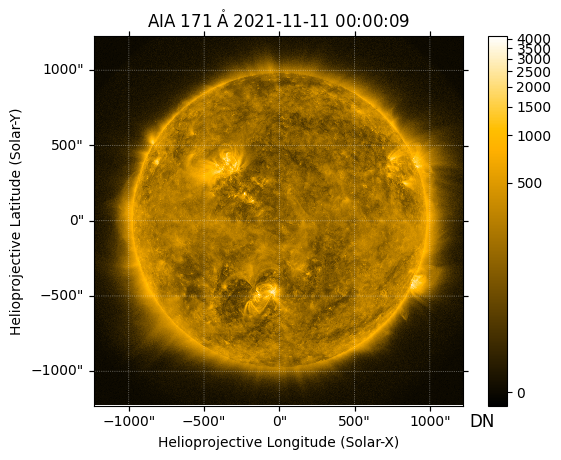

Synoptic


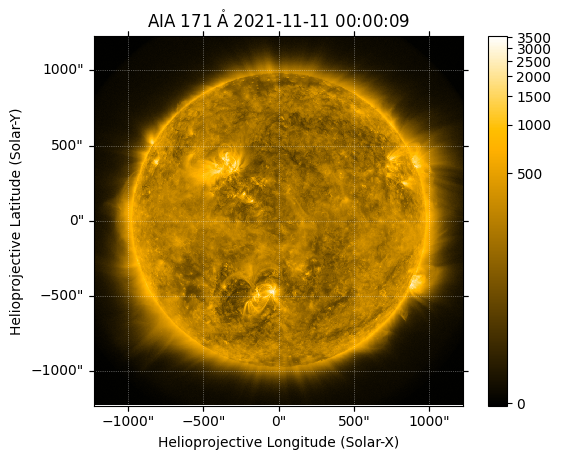

JP2


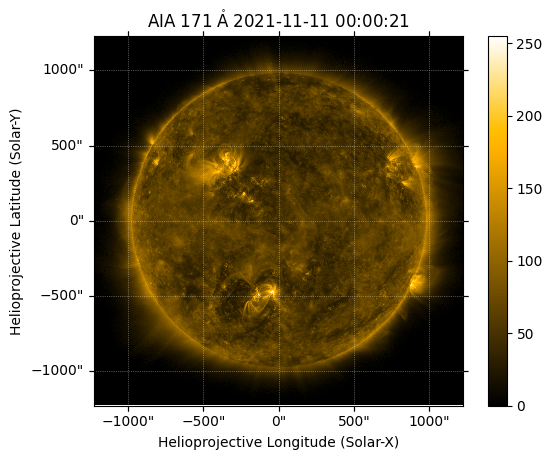

In [ ]:
print("Sample")
sample_map.peek()
print("Downloader")
downloader_map.peek()
print("JSOC")
jsoc_map.peek()
print("VSO")
vso_map.peek()
print("Synoptic")
synoptic_map.peek()
print("JP2")
jp2_map.peek()

### Meta

In [ ]:
print("Sample")
print(sample_map.meta)
print()
print("Downloader")
print(downloader_map.meta)
print()
print("JSOC")
print(jsoc_map.meta)
print()
print("VSO")
print(vso_map.meta)
print()
print("Synoptic")
print(synoptic_map.meta)
print()
print("JP2")
print(jp2_map.meta)
print()

Sample
('simple': 'True')
('bitpix': '16')
('naxis': '2')
('naxis1': '4096')
('naxis2': '4096')
('bld_vers': 'V9R41X')
('lvl_num': '1.0')
('t_rec': '2021-11-10T23:59:59Z')
('trecstep': '1.0')
('trecepoc': '1977.01.01_00:00:00.000_TAI')
('trecroun': '1')
('origin': 'SDO/JSOC-SDP')
('date': '2021-11-17T15:05:10Z')
('telescop': 'SDO/AIA')
('instrume': 'AIA_3')
('date-obs': '2021-11-11T00:00:09.35Z')
('t_obs': '2021-11-11T00:00:10.35Z')
('camera': '3')
('img_type': 'LIGHT')
('exptime': '2.000166')
('expsdev': '0.00012')
('int_time': '2.273438')
('wavelnth': '171')
('waveunit': 'angstrom')
('wave_str': '171_THIN')
('fsn': '245238334')
('fid': '0')
('quallev0': '0')
('quality': '0')
('totvals': '16777216')
('datavals': '16777216')
('missvals': '0')
('percentd': '100.0')
('datamin': '-8')
('datamax': '4158')
('datamedn': '130')
('datamean': '162.0052')
('datarms': '187.25')
('dataskew': '2.94')
('datakurt': '17.75')
('datacent': '174.03')
('datap01': '0.0')
('datap10': '6.0')
('datap25': '16.